In [ ]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import rasterio

In [5]:
import os
from skimage import io

#directory = "../data/images/downloads/cairo/20170828_085947_0f3b/"
#image_file = "20170828_085947_0f3b_3B_AnalyticMS.tif"

x_train = []
path = "../data/images/downloads/split256"
for path, dirname, files in os.walk(path):
    for file in files:
        if file.endswith(".tif"):
            img_in = io.imread(os.path.join(path,file))
            x_train.append(img_in)

x_train = np.array(x_train)

In [6]:
print(x_train.shape)

(374, 256, 256, 4)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(x_train, test_size=0.20, random_state=42)

print(X_train.shape)
print(X_test.shape)

(299, 256, 256, 4)
(75, 256, 256, 4)


In [8]:
num_samples = X_train.shape[0]
print(num_samples)

299


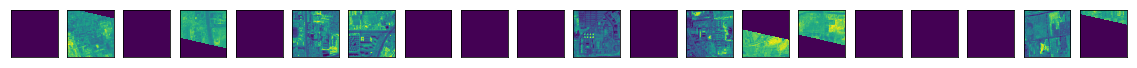

In [11]:
n = 20
plt.figure(figsize=(20, 2))
for i in range(1,n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(X_train[i][:, :, 3])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [15]:
# Autoencoder
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(256, 256, 4))  

x = Conv2D(128, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Need to get encoding output here

x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(4, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(inputs=input_img, 
                    outputs=[decoded])

encoder = Model(inputs=input_img,
                outputs=encoded)

autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy')

In [16]:
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test), 
                verbose=True)

Train on 299 samples, validate on 75 samples
Epoch 1/20
299/299 [==============================] - 16s 54ms/step - loss: -15449.9039 - val_loss: -34432.6786
Epoch 2/20
299/299 [==============================] - 12s 39ms/step - loss: -25560.5777 - val_loss: -34432.6870
Epoch 3/20
299/299 [==============================] - 12s 39ms/step - loss: -25560.5921 - val_loss: -34432.6998
Epoch 4/20
299/299 [==============================] - 12s 40ms/step - loss: -25198.6985 - val_loss: -34432.7260
Epoch 5/20
299/299 [==============================] - 12s 40ms/step - loss: -25560.6193 - val_loss: -34432.7227
Epoch 6/20
299/299 [==============================] - 12s 39ms/step - loss: -25560.6419 - val_loss: -34432.7740
Epoch 7/20
299/299 [==============================] - 12s 39ms/step - loss: -25560.7201 - val_loss: -34432.8994
Epoch 8/20
299/299 [==============================] - 12s 39ms/step - loss: -25023.2801 - val_loss: -34433.0223
Epoch 9/20
299/299 [==============================] - 12s 4

In [19]:
# Attempt at K-means
import cv2
# define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center=cv2.kmeans(x_train,2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now separate the data, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

error: /io/opencv/modules/core/src/kmeans.cpp:243: error: (-215) data0.dims <= 2 && type == 5 && K > 0 in function kmeans
